In [1]:
import numpy as np
import pandas as pd
import matplotlib
#!pip install pmdarima
import pmdarima as pm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
import itertools
#import multi_prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import *
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
import os
print(os.getcwd())

C:\Users\703290735\var_model\notebooks


In [3]:
df1 = pd.read_csv("..\excelsheets\demand_CLUB - MANCHESTER UNITED_11.csv")
df1.head(5)

,Unnamed: 0,Unnamed: 0.1,Order_Week,year,week,Article Article Description,Date,Demand Qty_final
0,0,0,201837,2018,37,MUFC A JSY,10-09-2018,823
1,1,1,201838,2018,38,MUFC A JSY,17-09-2018,257
2,2,2,201839,2018,39,MUFC A JSY,24-09-2018,132
3,3,3,201840,2018,40,MUFC A JSY,01-10-2018,87
4,4,4,201841,2018,41,MUFC A JSY,08-10-2018,48


In [4]:
gt = pd.read_csv("..\excelsheets\Trends_data.csv")
gt.columns = ['Trends_Date','Trends']

In [5]:
df1.columns
df1.rename(columns ={'Demand Qty':'Demand Qty_final'} , inplace = True)

In [6]:
df1.tail()

,Unnamed: 0,Unnamed: 0.1,Order_Week,year,week,Article Article Description,Date,Demand Qty_final
156,156,156,202137,2021,37,MUFC A JSY,13-09-2021,63
157,157,157,202138,2021,38,MUFC A JSY,20-09-2021,31
158,158,158,202139,2021,39,MUFC A JSY,27-09-2021,163
159,159,159,202140,2021,40,MUFC A JSY,04-10-2021,330
160,160,160,202141,2021,41,MUFC A JSY,11-10-2021,130


In [7]:
gt.tail()

,Trends_Date,Trends
156,12-09-2021,95
157,19-09-2021,46
158,26-09-2021,52
159,03-10-2021,39
160,10-10-2021,36


In [8]:
final = pd.concat([df1,gt],axis = 1)
#final = final[['Date','Demand Qty_final','Trends']]
final.head(20)

,Unnamed: 0,Unnamed: 0.1,Order_Week,year,week,Article Article Description,Date,Demand Qty_final,Trends_Date,Trends
0,0,0,201837,2018,37,MUFC A JSY,10-09-2018,823,09-09-2018,6
1,1,1,201838,2018,38,MUFC A JSY,17-09-2018,257,16-09-2018,39
2,2,2,201839,2018,39,MUFC A JSY,24-09-2018,132,23-09-2018,19
3,3,3,201840,2018,40,MUFC A JSY,01-10-2018,87,30-09-2018,13
4,4,4,201841,2018,41,MUFC A JSY,08-10-2018,48,07-10-2018,13
5,5,5,201842,2018,42,MUFC A JSY,15-10-2018,54,14-10-2018,13
6,6,6,201843,2018,43,MUFC A JSY,22-10-2018,39,21-10-2018,43
7,7,7,201844,2018,44,MUFC A JSY,29-10-2018,56,28-10-2018,12
8,8,8,201845,2018,45,MUFC A JSY,05-11-2018,61,04-11-2018,6
9,9,9,201846,2018,46,MUFC A JSY,12-11-2018,41,11-11-2018,17


In [9]:
final.tail()

,Unnamed: 0,Unnamed: 0.1,Order_Week,year,week,Article Article Description,Date,Demand Qty_final,Trends_Date,Trends
156,156,156,202137,2021,37,MUFC A JSY,13-09-2021,63,12-09-2021,95
157,157,157,202138,2021,38,MUFC A JSY,20-09-2021,31,19-09-2021,46
158,158,158,202139,2021,39,MUFC A JSY,27-09-2021,163,26-09-2021,52
159,159,159,202140,2021,40,MUFC A JSY,04-10-2021,330,03-10-2021,39
160,160,160,202141,2021,41,MUFC A JSY,11-10-2021,130,10-10-2021,36


In [10]:
df = final[['Date','Demand Qty_final','Trends']]
df

,Date,Demand Qty_final,Trends
0,10-09-2018,823,6
1,17-09-2018,257,39
2,24-09-2018,132,19
3,01-10-2018,87,13
4,08-10-2018,48,13
...,...,...,...
156,13-09-2021,63,95
157,20-09-2021,31,46
158,27-09-2021,163,52
159,04-10-2021,330,39


In [11]:
df['Date']=pd.to_datetime(df['Date'])

df = df.set_index('Date')
df = df.sort_index()

df1 = df.copy()
df


,Demand Qty_final,Trends
Date,,
2018-01-10,87,13
2018-03-12,75,26
2018-05-11,61,6
2018-08-10,48,13
2018-09-17,257,39
...,...,...
2021-10-05,0,27
2021-11-01,74,23
2021-11-10,130,36


In [12]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


In [13]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Demand Qty_final" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2679
 No. Lags Chosen       = 5
 Critical value 1%     = -3.473
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0164. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Trends" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6673
 No. Lags Chosen       = 1
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [4]:
train = df[:'2020-10-08'] # dataset to train
val = df['2020-08-17':] # last X months for test  
predict_date = len(df) - len(df[:'2020-08-17']) 
predict_date
val.tail()

NameError: name 'df' is not defined

In [15]:
#model specifying p,d,q range,hyperparameters
#sarimax,sarima
sxmodel1 = pm.auto_arima(train['Demand Qty_final'], exogenous=train[['Trends']],#m=52,seasonal = True,trace  =True)
                           start_p=0, start_q=0,n_jobs = 100,
                           max_p=4, max_q=4, m=52,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=1361.804, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1359.848, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1347.877, Time=2.59 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1351.391, Time=2.75 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1365.997, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1345.929, Time=0.15 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1347.873, Time=2.37 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1347.619, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1347.733, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1349.396, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1349.836, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=1350.468, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 14.572 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -668.965
Date:                Mon, 07 Mar 2022   AIC                           1345.929
Time:                        19:29:30   BIC                           1356.731
Sample:                             0   HQIC                          1350.311
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.0888     32.472      1.204      0.229     -24.556     102.733
Trends         0.0836      1.418      0.059      0.953      -2.695       2.862
ar.L1          0.3665      0.056      6.559      0.000       0.257       0.476
sigma2       1.12e+04   1097.534     10.206      0.000    9050.371    1.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2932.34
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             4.21
Prob(H) (two-sided):                  0.30   Kurtosis:                        26.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#val1 = val.drop('Trends',axis = 1)
#val1

fitted, confint  = sxmodel1.predict(n_periods=len(val),exogenous=np.tile(val['Trends'].values, 1).reshape(-1,1), 
                                    return_conf_int=True,alpha = 0.05)
fitted
#val

array([39.1224548 , 54.96798972, 59.51097424, 61.73300794, 62.03766015,
       63.72315422, 63.1516449 , 62.01723324, 61.69598941, 63.20502964,
       63.20678081, 64.37740435, 62.78980725, 64.54486604, 63.29134579,
       63.54206774, 62.87351101, 63.70921379, 64.29420522, 63.95992494,
       63.62564452, 63.12422381, 64.21063542, 62.20495248, 63.20779395,
       63.45850432, 62.53923297, 63.12422383, 62.20495248, 62.53923297,
       63.70921469, 63.54207444, 64.96276653, 63.3749342 , 64.71205616,
       63.70921469, 63.54207444, 62.78994334, 63.45850432, 64.37777567,
       70.06054401, 64.1270653 , 63.20779395, 62.95708358, 62.87351346,
       65.12990677, 66.21631837, 62.2885226 , 62.95708358, 63.45850432,
       66.7177391 , 68.13843119, 63.79278481, 69.64269339, 65.54775739,
       66.04917812, 63.95992506, 63.62564457, 64.71205616, 62.53923297,
       64.71205616])

In [17]:
#forecast = pd.DataFrame(forecast,index = val.index,columns=['Demand_Prediction'])
fitted_series = pd.Series(fitted, index=val.index)
lower_series = pd.Series(confint[:, 0], index=val.index)
upper_series = pd.Series(confint[:, 1], index=val.index)


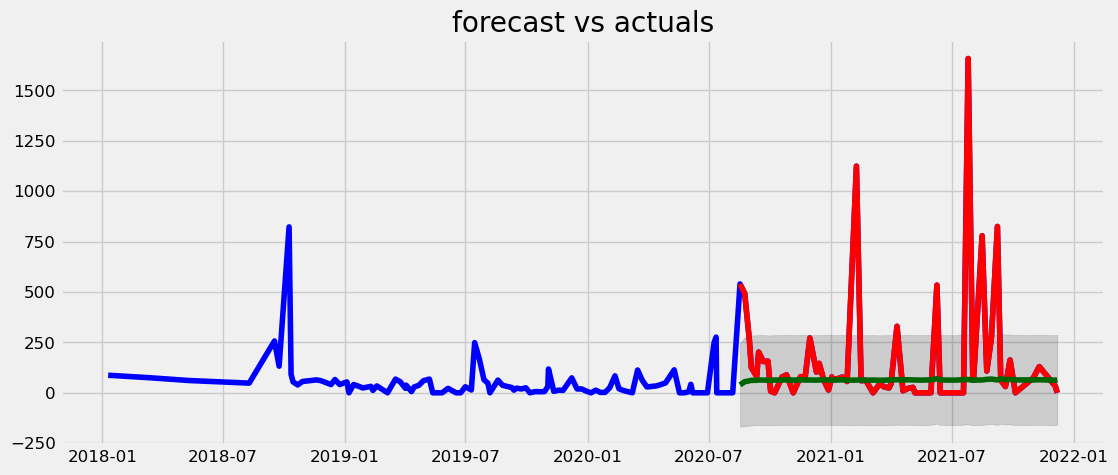

In [18]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Demand Qty_final'],label = 'train',color = 'blue')
plt.plot(val['Demand Qty_final'], label='test',color = 'red')
plt.plot(fitted_series, color='darkgreen',label = 'forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("forecast vs actuals")
plt.show()

In [19]:
fitted_series.values
val['Demand Qty_final'].values

array([ 540,  493,  264,  125,   81,  202,  155,  157,    8,    0,   78,
         89,    0,   80,   79,  272,  102,  146,   62,   14,   79,   62,
         78,   56, 1124,   60,   62,    0,   44,   29,   24,   45,  330,
         10,   21,   27,    0,    0,    0,    0,  534,    0,    0,    0,
          0,    0, 1658,   73,   62,  779,  108,  273,  825,   63,   31,
        163,    0,   74,  130,   33,    0], dtype=int64)

In [20]:
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = mean_squared_error(actual, forecast)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'mae': mae, 
            'mse': mse, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fitted_series.values, val['Demand Qty_final'].values)

{'mape': inf,
 'mae': 140.83826738518968,
 'mse': 94199.74357222665,
 'rmse': 306.91976732075545,
 'corr': -0.08771005448299783}

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
tr = scaler.fit_transform(train)
ts = scaler.fit_transform(val)
ts
#1500,0-1



array([[0.32569361, 0.07      ],
       [0.2973462 , 0.21      ],
       [0.15922799, 0.11      ],
       [0.07539204, 0.14      ],
       [0.04885404, 0.09      ],
       [0.12183353, 0.26      ],
       [0.09348613, 0.18      ],
       [0.0946924 , 0.04      ],
       [0.00482509, 0.        ],
       [0.        , 0.18      ],
       [0.04704463, 0.18      ],
       [0.05367913, 0.32      ],
       [0.        , 0.13      ],
       [0.0482509 , 0.34      ],
       [0.04764777, 0.19      ],
       [0.16405308, 0.22      ],
       [0.0615199 , 0.14      ],
       [0.0880579 , 0.24      ],
       [0.03739445, 0.31      ],
       [0.00844391, 0.27      ],
       [0.04764777, 0.23      ],
       [0.03739445, 0.17      ],
       [0.04704463, 0.3       ],
       [0.03377563, 0.06      ],
       [0.67792521, 0.18      ],
       [0.03618818, 0.21      ],
       [0.03739445, 0.1       ],
       [0.        , 0.17      ],
       [0.026538  , 0.06      ],
       [0.01749095, 0.1       ],
       [0.

In [22]:
tr = pd.DataFrame(tr,columns = train.columns,index = train.index)
ts = pd.DataFrame(ts,columns = val.columns,index = val.index)
tr.head(),tr.isnull().sum(),ts.isnull().sum()

(            Demand Qty_final    Trends
 Date                                  
 2018-01-10          0.105711  0.270833
 2018-03-12          0.091130  0.541667
 2018-05-11          0.074119  0.125000
 2018-08-10          0.058323  0.270833
 2018-09-17          0.312272  0.812500,
 Demand Qty_final    0
 Trends              0
 dtype: int64,
 Demand Qty_final    0
 Trends              0
 dtype: int64)

In [23]:
mod_sc = pm.auto_arima(tr['Demand Qty_final'], exogenous=tr[['Trends']],#m=52,seasonal = True,trace  =True)
                           start_p=0, start_q=0,n_jobs = 100,
                           max_p=4, max_q=4, m=52,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

mod_sc.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=-115.047, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=-117.002, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=-128.973, Time=2.05 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=-125.459, Time=1.43 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=-110.853, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=-130.921, Time=0.22 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=-128.977, Time=2.68 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=-129.232, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=-129.118, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=-127.454, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=-127.882, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=-126.382, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 13.720 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  69.461
Date:                Mon, 07 Mar 2022   AIC                           -130.921
Time:                        19:29:45   BIC                           -120.119
Sample:                             0   HQIC                          -126.540
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0475      0.039      1.204      0.229      -0.030       0.125
Trends         0.0049      0.083      0.059      0.953      -0.157       0.167
ar.L1          0.3665      0.056      6.560      0.000       0.257       0.476
sigma2         0.0165      0.002     10.207      0.000       0.013       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2932.41
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             4.21
Prob(H) (two-sided):                  0.30   Kurtosis:                        26.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
fit, conf  = mod_sc.predict(n_periods=len(ts),exogenous=np.tile(ts['Trends'].values, 1).reshape(-1,1), 
                                    return_conf_int=True,apha = 0.05)
fit

array([0.04715424, 0.06566933, 0.07171587, 0.0742581 , 0.07489165,
       0.07604479, 0.07577156, 0.07513019, 0.07495043, 0.07583645,
       0.07583858, 0.07652397, 0.07559515, 0.07662216, 0.07588869,
       0.07603541, 0.07564421, 0.07613322, 0.07647552, 0.07627992,
       0.07608432, 0.07579091, 0.07642662, 0.07525301, 0.07583981,
       0.07598652, 0.07544861, 0.07579091, 0.07525301, 0.07544861,
       0.07613322, 0.07603542, 0.07686672, 0.07593761, 0.07672002,
       0.07613322, 0.07603542, 0.07559531, 0.07598652, 0.07652442,
       0.07984966, 0.07637772, 0.07583981, 0.07569311, 0.07564421,
       0.07696453, 0.07760023, 0.07530191, 0.07569311, 0.07598652,
       0.07789364, 0.07872494, 0.07618212, 0.07960515, 0.07720903,
       0.07750243, 0.07627992, 0.07608432, 0.07672002, 0.07544861,
       0.07672002])

In [25]:
fit_series = pd.Series(fit, index=val.index)
lower_bound = pd.Series(conf[:, 0], index=val.index)
upper_bound = pd.Series(conf[:, 1], index=val.index)
fit_series

Date
2020-08-17    0.047154
2020-08-24    0.065669
2020-08-31    0.071716
2020-09-03    0.074258
2020-09-11    0.074892
                ...   
2021-10-05    0.076280
2021-11-01    0.076084
2021-11-10    0.076720
2021-12-04    0.075449
2021-12-07    0.076720
Length: 61, dtype: float64

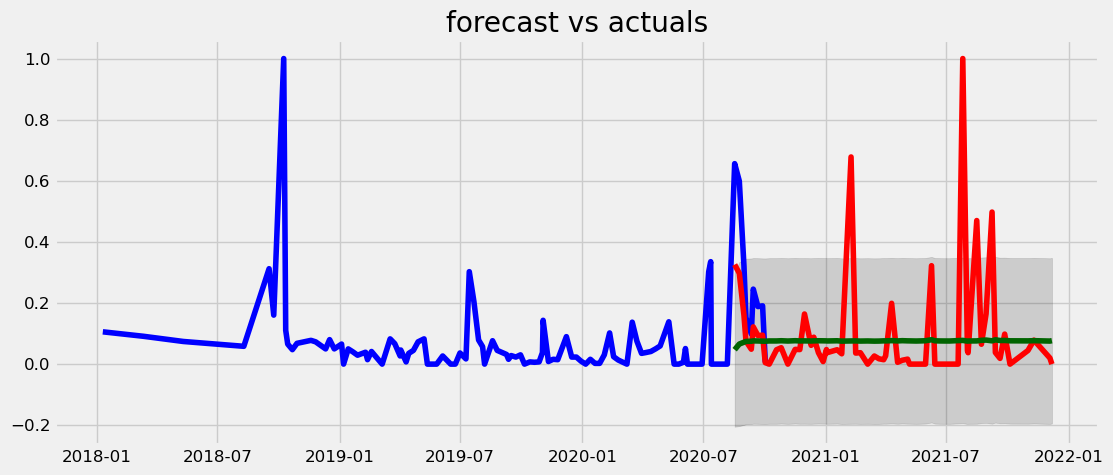

In [26]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(tr['Demand Qty_final'],label = 'train',color = 'blue')
plt.plot(ts['Demand Qty_final'], label='test',color = 'red')
plt.plot(fit_series, color='darkgreen',label = 'forecast')
plt.fill_between(lower_bound.index, 
                 lower_bound, 
                 upper_bound, 
                 color='k', alpha=.15)

plt.title("forecast vs actuals")
plt.show()

In [27]:
conf_sca = pd.DataFrame(scaler.inverse_transform(conf),columns = ['lower_bound','upper_bound'])
conf_sca

,lower_bound,upper_bound
0,-339.701879,29.919502
1,-336.190789,33.410754
2,-329.692655,34.228136
3,-325.949391,34.510811
4,-324.962311,34.577986
...,...,...
56,-322.670386,34.717406
57,-322.994694,34.697846
58,-321.940692,34.761417
59,-324.048696,34.634275


In [28]:
dup = pd.concat([fit_series,ts['Demand Qty_final']],axis = 1)
dup.columns = ['demand_pred','demand_dup']
dup.head()

,demand_pred,demand_dup
Date,,
2020-08-17,0.047154,0.325694
2020-08-24,0.065669,0.297346
2020-08-31,0.071716,0.159228
2020-09-03,0.074258,0.075392
2020-09-11,0.074892,0.048854


In [29]:
con_sca = pd.DataFrame(scaler.inverse_transform(dup),columns = dup.columns)
con_sca = con_sca[['demand_pred']]
con_sca

,demand_pred
0,78.181733
1,108.879757
2,118.904920
3,123.119929
4,124.170350
...,...
56,126.472105
57,126.147796
58,127.201798
59,125.093794


In [30]:
val.head()

,Demand Qty_final,Trends
Date,,
2020-08-17,540,7
2020-08-24,493,21
2020-08-31,264,11
2020-09-03,125,14
2020-09-11,81,9


In [31]:
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE            # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = mean_squared_error(actual, forecast)
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape,'mae': mae, 
            'mse': mse, 'rmse':rmse})

forecast_accuracy(con_sca.values, val['Demand Qty_final'].values)

{'mape': inf,
 'mae': 158.5312799650744,
 'mse': 86396.88873996423,
 'rmse': 292.9276147703424}

In [32]:
{'mape': inf,
 'mae': 152.06635452606324,
 'mse': 97381.79144005523,
 'rmse': 312.06055732830964,
 'corr': -0.19215569047542483}


{'mape': inf,
 'mae': 152.06635452606324,
 'mse': 97381.79144005523,
 'rmse': 312.06055732830964,
 'corr': -0.19215569047542483}